In [1]:
#IMPORTING ALL THE REQUIRED LIBRARIES
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#READING THE CSV FILE INTO PANDAS DATAFRAME AND DISPLAYING THE FIRST 5 ROWS
df = pd.read_csv('Cumiliative Water level data.csv')
df = df.dropna() #dropping the rows with NA as entry
df.head()

,DATE,WATER LEVEL (m)
0,01-07-2018,233.52
1,02-07-2018,233.64
2,03-07-2018,233.58
3,04-07-2018,233.69
4,05-07-2018,233.81


In [3]:
#DISPLAYING THE LAST 5 ROWS OF THE DATAFRAME
df.tail()

,DATE,WATER LEVEL (m)
1092,27-06-2021,234.26
1093,28-06-2021,234.13
1094,29-06-2021,234.24
1095,30-06-2021,234.08
1096,01-07-2021,233.65


In [25]:
df.describe()

,WATER LEVEL (m)
count,918.000000
mean,233.749063
std,0.387718
min,232.670000
25%,233.470000
50%,233.720000
75%,234.010000
max,234.960000


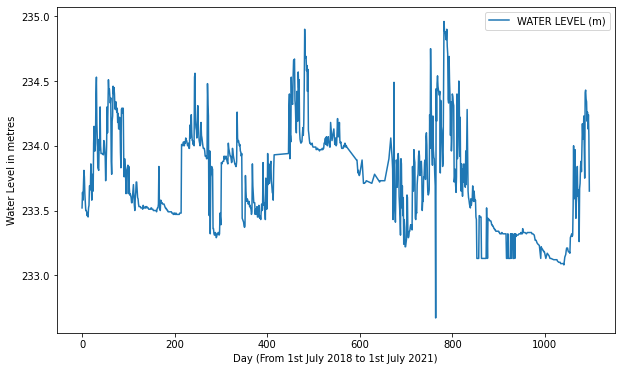

In [4]:
#PLOTTING THE DATA
df.plot()
plt.ylabel('Water Level in metres')
plt.xlabel('Day (From 1st July 2018 to 1st July 2021)')
plt.show()

In [5]:
#Augmented Dickey Fuller test (To find the value of parameter d)
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['WATER LEVEL (m)'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))
#AS THE p-value IS NOT LESS THAN 0.05, WE CAN SAY THAT THE TIME SERIES IS NOT STATIONARY BUT AS VERY CLOSE TO 0.05 AND adf STATISTIC IS ALSO CLOSE TO CRITICAL VALUE, THIS TIME SERIES CAN SUFFICE WITHOUT DIFFERENCING TOO

ADF Statistic: -2.6914553439448263
p-value: 0.07552857492385016
Critical Values:
	1%: -3.4375803238413085
	5%: -2.8647318597670877
	10%: -2.568469555703587


In [6]:
#WITH DIFFERENCING
df_differenced = np.log(df['WATER LEVEL (m)'])
df_differenced = df['WATER LEVEL (m)'].diff().dropna()
df = df.drop(df.index[0])
result = adfuller(df_differenced)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -12.906097761438735
p-value: 4.149840834889739e-24
Critical Values:
	1%: -3.4375803238413085
	5%: -2.8647318597670877
	10%: -2.568469555703587


# So the model will be tried with d=0 and d=1 both

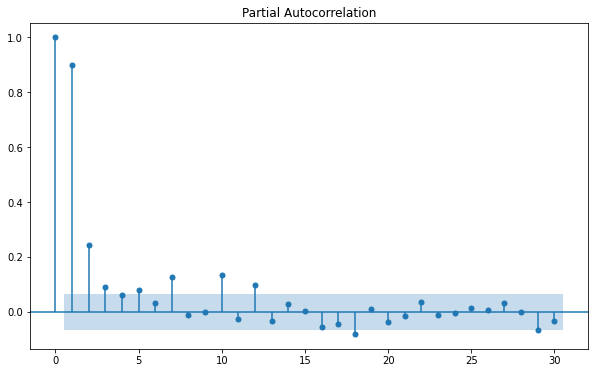

In [7]:
#TO FIND THE VALUE OF PARAMETER p (d=0)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['WATER LEVEL (m)']);

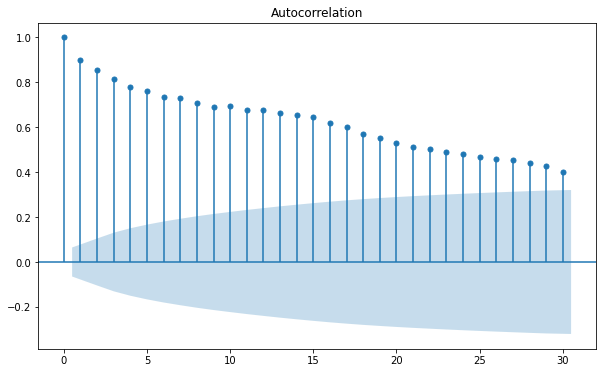

In [8]:
#TO FIND THE VALUE OF PARAMETER q (d=0)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['WATER LEVEL (m)']);

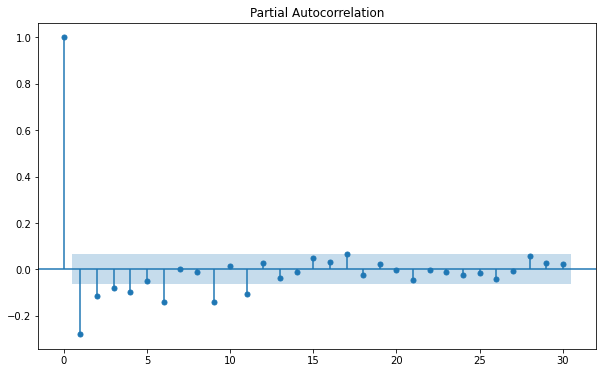

In [9]:
#TO FIND THE VALUE OF PARAMETER p (d=1)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_differenced);

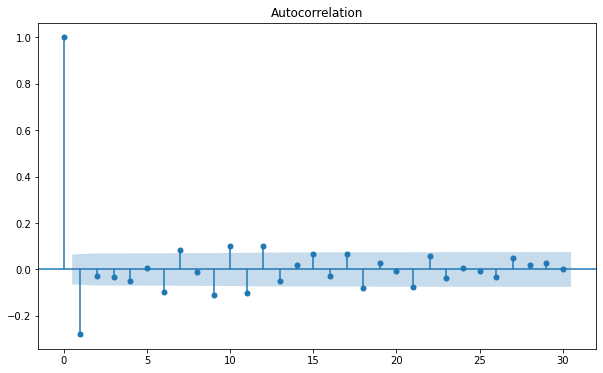

In [10]:
#TO FIND THE VALUE OF PARAMETER q (d=1)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_differenced);

In [11]:
### d=0 ###
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(df['WATER LEVEL (m)'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=18, max_q=30, # maximum p and q
                      m=1,              # frequency of series
                      d=0,           
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-697.590, Time=5.68 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=868.605, Time=0.42 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-638.142, Time=1.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=188.799, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12621.173, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-693.090, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-696.873, Time=3.45 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-144.079, Time=0.57 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-690.578, Time=2.01 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-636.829, Time=2.46 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-667.757, Time=0.77 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 17.216 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  

In [12]:
### d=1 ###
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(df['WATER LEVEL (m)'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=15, max_q=20, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-701.240, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-592.326, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-664.473, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-682.760, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-594.326, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-705.569, Time=1.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-674.592, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-703.739, Time=1.66 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-700.475, Time=1.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-704.811, Time=0.78 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-678.659, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-701.975, Time=1.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-707.539, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-703.213, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]          

# The best model with d=0 is ARIMA(1,0,1) and the best model with d=1 is ARIMA(2,1,1)

In [13]:
#d=0
import warnings
warnings.filterwarnings('ignore')
model_d0 = ARIMA(df['WATER LEVEL (m)'], order=(1,0,1))
model_d0_fit = model_d0.fit(disp=0)
print(model_d0_fit.summary())

                              ARMA Model Results                              
Dep. Variable:        WATER LEVEL (m)   No. Observations:                  918
Model:                     ARMA(1, 1)   Log Likelihood                 354.308
Method:                       css-mle   S.D. of innovations              0.164
Date:                Wed, 21 Jul 2021   AIC                           -700.616
Time:                        20:10:56   BIC                           -681.327
Sample:                             0   HQIC                          -693.255
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   233.7478      0.078   2989.916      0.000     233.595     233.901
ar.L1.WATER LEVEL (m)     0.9538      0.011     87.765      0.000       0.932       0.975
ma.L1.WA

In [14]:
#d=1
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(df['WATER LEVEL (m)'], order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:      D.WATER LEVEL (m)   No. Observations:                  917
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 357.785
Method:                       css-mle   S.D. of innovations              0.164
Date:                Wed, 21 Jul 2021   AIC                           -705.570
Time:                        20:10:57   BIC                           -681.464
Sample:                             1   HQIC                          -696.369
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0004      0.002      0.175      0.861      -0.004       0.004
ar.L1.D.WATER LEVEL (m)     0.4880      0.051      9.511      0.000       0.387       0.589


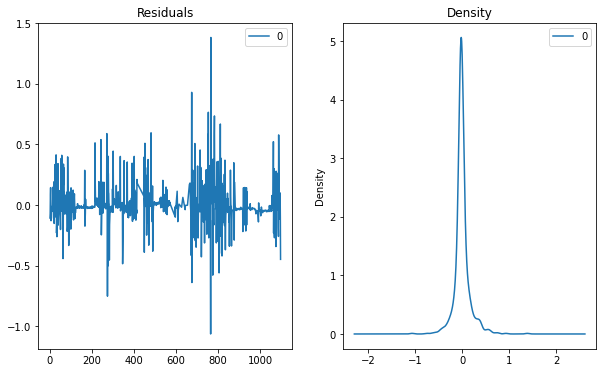

In [15]:
# Plot residual errors (d=0)
residuals = pd.DataFrame(model_d0_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

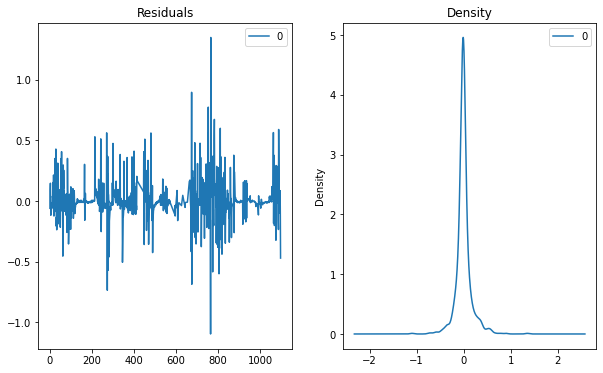

In [16]:
# Plot residual errors (d=1)
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

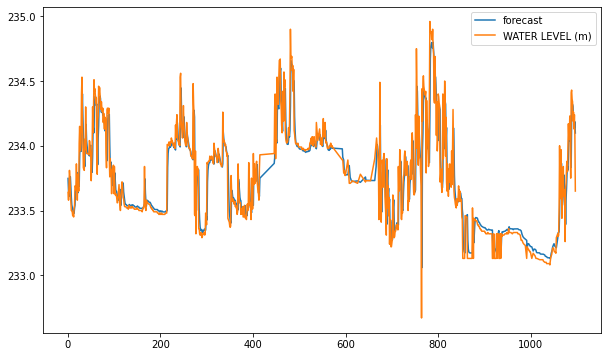

In [17]:
#d=0
model_d0_fit.plot_predict()
plt.show()

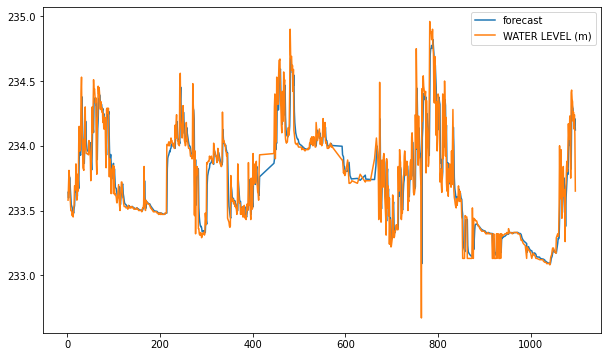

In [18]:
#d=1
model_fit.plot_predict()
plt.show()

# Splitting the data into train and test

In [19]:
from statsmodels.tsa.stattools import acf

train = df['WATER LEVEL (m)'][:760]
test = df['WATER LEVEL (m)'][760:]

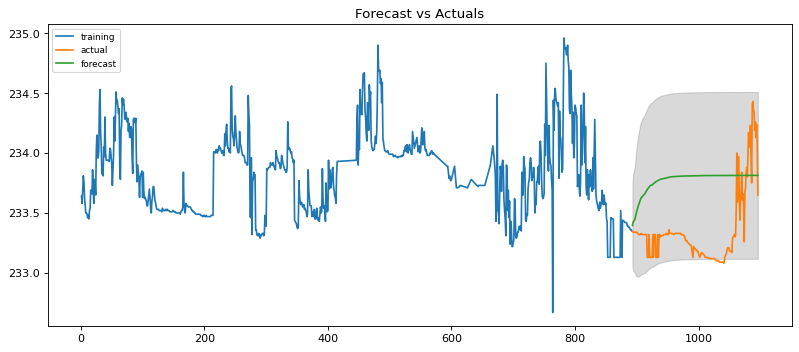

In [20]:
# Build Model using training data
model_d0 = ARIMA(train, order=(1, 0, 1))  
fitted = model_d0.fit(disp=-1)  
# Forecast
fc, se, conf = fitted.forecast(158, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [21]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.0020109078039246913,
 'me': 0.3914738037265619,
 'mae': 0.46915797872914744,
 'mpe': 0.0016792447448410737,
 'rmse': 0.5075821379049906,
 'acf1': 0.9190845206861997,
 'corr': 0.11879837897086391,
 'minmax': 0.0020064761891788185}

# mean absolute percentage error (mape) in the model is 0.2% which means the model ARIMA (1,0,1) is 99.8% accurate

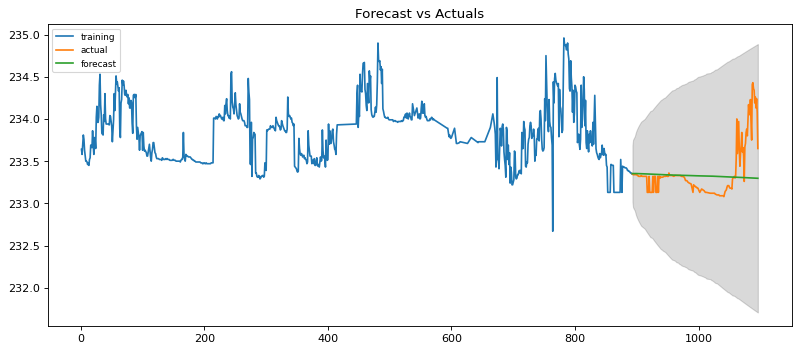

In [22]:
# Build Model using training data
model = ARIMA(train, order=(2, 1, 1))  
fitted = model.fit(disp=-1)  
# Forecast
fc, se, conf = fitted.forecast(158, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [23]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.0009021890508672735,
 'me': -0.05495440259256331,
 'mae': 0.2108566624197217,
 'mpe': -0.00023351721258740336,
 'rmse': 0.33610639267955755,
 'acf1': 0.9257015151537644,
 'corr': -0.5520772334336054,
 'minmax': 0.0009019381009929273}

# mean absolute percentage error (mape) in the model is 0.09% which means the model ARIMA (2,1,1) is 99.91% accurate and hence ARIMA(2,1,2) is the best choice here

# FUTURE FORECASTS

In [24]:
# Forecast 
#n_periods = number of days for which you want the forecast
#fc, confint = model.predict(n_periods, return_conf_int=True)
#index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

## make series for plotting purpose
#fc_series = pd.Series(fc, index=index_of_fc)
#lower_series = pd.Series(confint[:, 0], index=index_of_fc)
#upper_series = pd.Series(confint[:, 1], index=index_of_fc)
